<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%B0%95%EC%A7%80%ED%99%98%26%EC%B5%9C%EC%9A%A9%EB%AF%BC/DIP/IM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



추후, 이미지 여러장 사용할 경우



In [ ]:
path = "/content"   #최상위 폴더

In [ ]:
src_path = path+'/src/'
label_path = path+'/label/'

In [ ]:
src_image=[]        # src 이미지
label_image = []    # label 이미지
for i in os.listdir(src_path):
  src_image.append(src_path + i)

for i in os.listdir(label_path):
  mask_image.append(label_path + i)


------------------------------------------

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

img_path = cv2.imread('/content/18-40-02-02 (SLA).jpg')
mask_path = cv2.imread('/content/18-40-02-02 (SLA)_re_image.png')
img = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask_path, cv2.COLOR_BGR2RGB)

In [ ]:
class A:
  global cols
  global rows
  global channels
  
  def translation(temp, x_range, y_range, control=1):
    x = random.randint(-x_range, x_range) # 지정한 범위 내 random한 값
    y = random.randint(-y_range, y_range) # 지정한 범위 내 random한 값

    # translation matrix
    M = np.float32([[1,0,x],
                    [0,1,y]])
    ret = cv2.warpAffine(temp, M, (A.cols, A.rows)) # translation
    ret_img = ret[:,:,:A.channels] # 변환된 img
    ret_mask = ret[:,:,A.channels:] # 변환된 mask
    return ret_img, ret_mask


  def rotation(temp, degree, center = 0, control=1):
    if center != 0: # 회전 중심 위치
        center_x = random.randint(-center, center)
        center_y = random.randint(-center, center)
    else:
        center_x = 0
        center_y = 0
    M = cv2.getRotationMatrix2D((A.cols/2 + center_x, A.rows/2 + center_y), degree, 1) # rotaion matrix

    ret = cv2.warpAffine(temp, M, (A.cols, A.rows)) # rotaion
    ret_img = ret[:,:,:A.channels] # 변환된 img
    ret_mask = ret[:,:,A.channels:] # 변환된 mask
    return ret_img, ret_mask


  def flip(temp, control):        # 1이면 좌우(mirror) / 0이면 상하(flip)
    #flip 수행
    if control == 0:
      ret = cv2.flip(temp, 0)
  
    # mirror 수행
    elif control == 1:
      ret = cv2.flip(temp, 1)

    else:
      pass
    # 둘다 수행 안함
      
      
    ret_img = ret[:,:,:A.channels] # 변환된 img
    ret_mask = ret[:,:,A.channels:] # 변환된 mask
    return ret_img, ret_mask

  def image_mask(img, mask):    #image와 mask 합치기
    if img.shape[:2] != mask.shape[:2]: # image 와 mask의 rows, cols의 크기는 같아야함.
      print(f"Image and mask's shape[:2] must be equal. Your image.shape[:2] = {img.shape[:2]}, and mask.shape = {mask.shape[:2]}")
      return None
    # rows, cols 을 구함
    if img.ndim == 2:
        A.rows, A.cols = img.shape
        A.channels = 1
    elif img.ndim == 3:
        A.rows, A.cols, A.channels = img.shape
    else:
        print(f"Image's ndim must be 2 or 3. Your input image's ndim is {img.ndim}")
        return None
    # image와 mask의 channel이 다를 경우 (ex: image는 3채널 rgb인데 mask는 grayscale일 경우)
    if img.shape != mask.shape:
        if img.ndim == 2:
            img = img.reshape((img.shape[0], img.shape[1], 1))
        elif mask.ndim == 2:
            mask = mask.reshape((mask.shape[0], mask.shape[1], 1))
        else:
            print(f'Hmm? img.shape = {img.shape}, mask.shape = {mask.shape}')
            return None
    else:
        if img.ndim == 2: # 둘 다 channel이 1일 경우 dimension을 추가해주어야 concate 후 분리 가능
            img = img.reshape((img.shape[0], img.shape[1], 1))
            mask = mask.reshape((mask.shape[0], mask.shape[1], 1))


    temp = np.concatenate((img, mask), axis=-1) # img와 mask를 합친 후 한 번에 수행
    return temp



In [ ]:
def run(): 

  temp = A.image_mask(img, mask)
  a, b = A.translation(temp, 500, 500,0)
  c, d = A.rotation(temp, 60,0)
  e, f = A.flip(temp,1)
  g, h = A.flip(temp,0)

  

  plt.figure(figsize=(10,40))
  plt.subplot(10,2,1)
  plt.imshow(img) 
  plt.title('Orig Img')
  plt.subplot(10,2,2)
  plt.imshow(mask)
  plt.title('Orig label')

  plt.subplot(10,2,3)
  plt.imshow(a)
  plt.title('translation Img')
  plt.subplot(10,2,4)
  plt.imshow(b)
  plt.title('translation label')

  plt.subplot(10,2,5)
  plt.imshow(c)
  plt.title('rotation Img')
  plt.subplot(10,2,6)
  plt.imshow(d)
  plt.title('rotation label')
  
  plt.subplot(10,2,7)
  plt.imshow(e)
  plt.title('flip Img')
  plt.subplot(10,2,8)
  plt.imshow(f)
  plt.title('flip label')

  plt.subplot(10,2,9)
  plt.imshow(g)
  plt.title('mirror Img')
  plt.subplot(10,2,10)
  plt.imshow(h)
  plt.title('mirror label')

  plt.show()

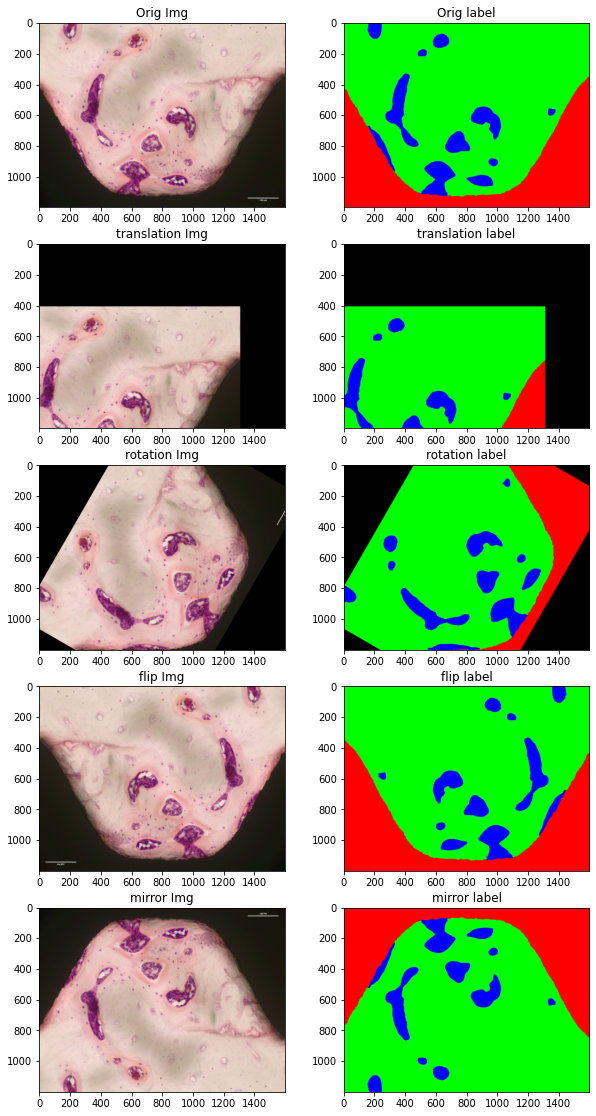

In [ ]:
run()

1. 함수 하나하나 출력을 하느라 아직 코드가 지져분해 보이긴 해요.

2. 이미지 합치는 것을 따로 빼어서 함수로 작성을 했고
저는 shape에 대해서만 생각을 하고 있다가 채널이 다를 경우를 생각 못하고 있었는데 만일 여러장의 사진을 불러 온다면 shape과 채널의 크기 조건문을 조금 생각해 봐야 할 것 같아요.
3. 지금은 합친 이미지를 각각의 함수에서 넣어놨는데 이것도 나중에 하나로 빼도 될 듯 싶어요.
4. 나중에 csv에서 실행 유무를 주기 위해서 control 변수 하나더 넣어 놨습니다.
5. mirror도 간단해서 일단 넣어놓긴 했어요.